<a href="https://colab.research.google.com/github/KavindaKGD/DL_Final_Assignment/blob/dev%2FKavinda/VGG16_Streets_Buildings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports & Versions

In [24]:
import os, zipfile, shutil, random, pathlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

Mount Google Drive

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:

ZIP_PATH = "/content/drive/MyDrive/DLFinalAssignment/data.zip"

!unzip -q "$ZIP_PATH" -d /content/data



replace /content/data/data/seg_test/buildings/20057.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [27]:
train_data_dir = "/content/data/data/seg_train"
test_data_dir  = "/content/data/data/seg_test"


In [28]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

In [29]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    subset='training',
    validation_split=0.2,
    seed=42
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    subset='validation',
    validation_split=0.2,
    seed=42
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

Found 4573 files belonging to 2 classes.
Using 3659 files for training.
Found 4573 files belonging to 2 classes.
Using 914 files for validation.
Found 938 files belonging to 2 classes.


In [30]:
class_names = train_data.class_names
print("Classes:", class_names)

Classes: ['buildings', 'street']


In [31]:
# Normalize to [0,1]
train_data = train_data.map(lambda x,y: (x/255.0, y))
validation_data = validation_data.map(lambda x,y: (x/255.0, y))
test_data = test_data.map(lambda x,y: (x/255.0, y))

In [32]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(include_top=False, weights="imagenet", input_shape=(150,150,3))
for layer in base_model.layers:
    layer.trainable = False  # freeze convolutional base

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=validation_data
)


Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 25s 185ms/step - accuracy: 0.8359 - loss: 0.3948 - val_accuracy: 0.9278 - val_loss: 0.1854
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.9181 - loss: 0.2045 - val_accuracy: 0.9300 - val_loss: 0.1895
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 0.9428 - loss: 0.1567 - val_accuracy: 0.9365 - val_loss: 0.1688
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9537 - loss: 0.1306 - val_accuracy: 0.9333 - val_loss: 0.1794
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9481 - loss: 0.1276 - val_accuracy: 0.9289 - val_loss: 0.1842


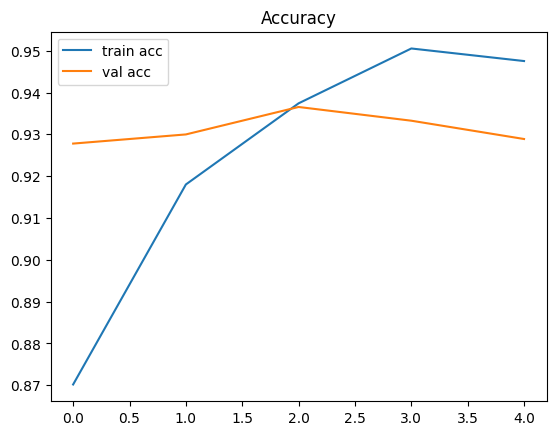

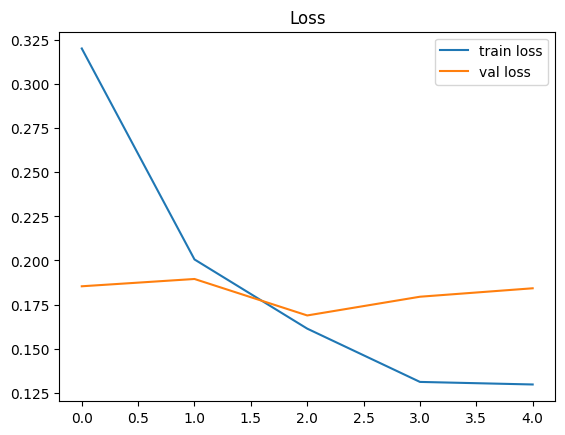

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")
plt.show()


In [35]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.9201 - loss: 0.2196
Test Accuracy: 0.9200
